In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:/Users/alexa/Downloads/D483.xlsx")

In [3]:
df

,TestResult,pub,WhytestedOther,Flutest,symptoms,symptomsresp,symptomsconsresp,symptomsgastro,symptomsconsgastro,symptomsneuro,...,explasttime4=publictrans,explasttime5=airplane,explasttime6=cruise,explasttime7=barcaferest,explasttime8=grocery,explasttime9=retail,explasttime10=visit,explasttime11=gym_team,explasttime12=rlgssvc,explasttime13=hcp
0,"Yes, and I tested negative",I came into contact with someone who has the c...,NaN,"No, I have not been tested",None,None,NaN,None,NaN,None,...,Mid March to May 2020,Mid March to May 2020,Mid March to May 2020,More recently,More recently,More recently,More recently,Mid March to May 2020,More recently,August/September 2020
1,"Yes, and I tested negative",I came into contact with someone who has the c...,NaN,"Yes, and I tested negative",None,None,NaN,None,NaN,None,...,Feb. to early March 2020 or before,Feb. to early March 2020 or before,Never,More recently,More recently,More recently,More recently,Feb. to early March 2020 or before,More recently,August/September 2020
2,"Yes, and I tested positive",I came into contact with someone who has the c...,NaN,"No, I have not been tested",Fatigue (more than normal),Sore throat,No,Diarrhea,No,Headaches,...,Feb. to early March 2020 or before,Feb. to early March 2020 or before,Feb. to early March 2020 or before,More recently,More recently,August/September 2020,More recently,Feb. to early March 2020 or before,August/September 2020,More recently
3,"Yes, and I tested negative",I came into contact with someone who has the c...,NaN,"No, I have not been tested",NaN,"Runny nose,Sore throat",Yes,"Diarrhea,Stomach or abdominal pain",Yes,Headaches,...,Mid March to May 2020,Mid March to May 2020,NaN,August/September 2020,More recently,June/July 2020,August/September 2020,Mid March to May 2020,Mid March to May 2020,August/September 2020
4,"Yes, and I tested negative",I came into contact with someone who has the c...,NaN,"No, I have not been tested",None,Sore throat,No,Stomach or abdominal pain,No,None,...,Feb. to early March 2020 or before,Never,Never,More recently,More recently,More recently,More recently,June/July 2020,Feb. to early March 2020 or before,Feb. to early March 2020 or before
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,"Yes, and I tested positive","I had coronavirus symptoms (fever, cough, chil...",NaN,"No, I have not been tested",None or I did not get tested,"Runny nose,Cough",No,Change in or loss of appetite,No,"Loss of smell,Loss of taste",...,NaN,NaN,NaN,NaN,More recently,More recently,More recently,NaN,NaN,NaN
479,"Yes, and I tested negative","I had coronavirus symptoms (fever, cough, chil...",NaN,"No, I have not been tested",NaN,"Cough,Sore throat",No,Change in or loss of appetite,No,None or I did not get tested,...,June/July 2020,June/July 2020,Never,Mid March to May 2020,More recently,More recently,More recently,Mid March to May 2020,Never,June/July 2020
480,"Yes, and I tested negative","I had coronavirus symptoms (fever, cough, chil...",NaN,"Yes, and I tested negative","Fever or feeling feverish,Fatigue (more than n...","Difficulty breathing,Chest pain",Not sure,Stomach or abdominal pain,Yes,"Headaches,Any tingling/numbness/swelling in ha...",...,June/July 2020,Feb. to early March 2020 or before,Never,August/September 2020,August/September 2020,August/September 2020,More recently,Never,Never,More recently
481,"Yes, and I tested negative","I had coronavirus symptoms (fever, cough, chil...",NaN,"Yes, and I tested negative",Fever or feeling feverish,"Runny nose,Cough,Sore throat",Not sure,None or I did not get tested,NaN,Headaches,...,More recently,Mid March to May 2020,Never,August/September 2020,More recently,More recently,More recently,Feb. to early March 2020 or before,August/September 2020,Feb. to early March 2020 or before


In [4]:
df.columns

Index(['TestResult', 'pub', 'WhytestedOther', 'Flutest', 'symptoms',
       'symptomsresp', 'symptomsconsresp', 'symptomsgastro',
       'symptomsconsgastro', 'symptomsneuro', 'symptomsconsneuro',
       'symptomsinflamm', 'symptomsconsinflamm', 'symptomsfirst', 'ACE',
       'Bloodtype', 'underlying', 'overallhealth', 'prevCOVID', 'exposed',
       'maskindoors', 'socialdist', 'foodpoison', 'flushot', 'flushotlast',
       'healthcare', 'essential', 'state', 'countries', 'exp1', 'exp2', 'exp3',
       'exp4', 'exp5', 'exp6', 'exp7', 'exp8', 'exp9', 'exp10', 'exp11',
       'exp12', 'COVIDstigma1', 'COVIDstigma2', 'COVIDstigma3', 'COVIDstigma4',
       'COVIDstigma5', 'COVIDstigma6', 'COVIDstigma7', 'COVIDstigma8',
       'appknwldg', 'appcurrent', 'appinterest', 'appwhy', 'appwhynot',
       'COVIDvaccine', 'vaccine1', 'children', 'vaccine2', 'vaccine3',
       'vaccine4', 'vaccineinfo', 'living', 'livingpeople', 'Unnamed: 63',
       'age', 'Race', 'Unnamed: 66', 'Ethnicity', 'gender

In [5]:
df.shape

(483, 82)

# DATA PREPROCESSING/ Cleaning:

In [6]:
df = df[df['TestResult'].isin(['Yes, and I tested negative','Yes, and I tested positive'])][['TestResult',
            'symptomsfirst','symptoms','symptomsresp','symptomsgastro','symptomsneuro'
            ,'symptomsinflamm'
            ,'COVIDvaccine'
            ,'age'
            ,'Ethnicity'
            ,'Race', 'gender','flushot'
            ,'symptomsconsresp', 'symptomsconsgastro', 'symptomsconsneuro'
            ,'symptomsconsinflamm','prevCOVID',
            ]]

In [7]:
# Adding a new column by naming it as Test Positive , mapping the results into binary values.
df['TestPositive'] = df['TestResult'].replace({'Yes, and I tested positive': 1, 'Yes, and I tested negative': 0})

In [8]:
df.shape

(461, 19)

In [9]:
# Rename the columns while mapping the values in the columns into binary.
df['IgnoreRespSymp']   = df['symptomsconsresp'].map(   {'Yes': 1, 'No': 0, 'Not sure' : 0, np.nan: 0})
df['IgnoreGastroSymp'] = df['symptomsconsgastro'].map( {'Yes': 1, 'No': 0, 'Not sure' : 0, np.nan: 0})
df['IgnoreNeuroSymp']  = df['symptomsconsneuro'].map(  {'Yes': 1, 'No': 0, 'Not sure' : 0, np.nan: 0})
df['IgnoreInflamSymp'] = df['symptomsconsinflamm'].map({'Yes': 1, 'No': 0, 'Not sure' : 0, np.nan: 0})
df['PriorCOVID'] = df['prevCOVID'].map({'Yes' :1, 'No' : 0, np.nan:0})
df['FLUVaccine'] = df['flushot'].map({'Yes': 1, 'No': 0, 'Not sure' : 0, np.nan: 0})

In [10]:
df['symptoms_concat'] = df[['symptoms','symptomsresp','symptomsgastro','symptomsneuro',
                                'symptomsinflamm']].astype(str).apply(','.join, axis=1)

In [11]:
df = df.fillna('NaN')

In [12]:
# select columns 
df = df[['TestPositive',
             'symptomsfirst','symptoms_concat'
             , 'age', 'COVIDvaccine', 'PriorCOVID', 'FLUVaccine'
             ,'Ethnicity'
             , 'Race', 'gender'
            , 'IgnoreRespSymp', 'IgnoreGastroSymp', 'IgnoreNeuroSymp', 'IgnoreInflamSymp'
            ]]

In [13]:
# Identify the list of symptom from "symptoms_concat" column
symptoms = list(set((','.join(df['symptoms_concat'].values.tolist())).split(",")))
symptoms = [sub.split(" (")[0] for sub in symptoms]

symptoms.remove('None')
symptoms.remove('None or I did not get tested')
symptoms.remove('nan')
    
len(symptoms)

29

In [14]:
# binarizing symptoms
for s in symptoms:
    df[s.lower()] = pd.np.where(df.symptoms_concat.str.contains(s), 1,0)

C:\Users\alexa\AppData\Local\Temp/ipykernel_10736/3066947489.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df[s.lower()] = pd.np.where(df.symptoms_concat.str.contains(s), 1,0)


In [15]:
df.columns

Index(['TestPositive', 'symptomsfirst', 'symptoms_concat', 'age',
       'COVIDvaccine', 'PriorCOVID', 'FLUVaccine', 'Ethnicity', 'Race',
       'gender', 'IgnoreRespSymp', 'IgnoreGastroSymp', 'IgnoreNeuroSymp',
       'IgnoreInflamSymp', 'pinkeye or conjunctivitis', 'new confusion',
       'shortness of breath', 'headaches', 'change in or loss of appetite',
       'muscle aches', 'loss of smell', 'bluish lips or face',
       'stomach or abdominal pain', 'runny nose', 'chest pain',
       'loss of balance', 'fatigue',
       'red or purple rash or lesions on your toes', 'loss of taste',
       'joint or any other unexplained pain', 'wheezing', 'slurred speech',
       'cough', 'sore throat', 'nausea or vomiting', 'difficulty breathing',
       'fever or feeling feverish', 'chills',
       'any tingling/numbness/swelling in hands or feet', 'excessive sweating',
       'unexplained rashes anywhere else', 'unusual shivering or shaking',
       'diarrhea'],
      dtype='object')

In [16]:
df.shape

(461, 43)

In [17]:
# Convert age into 2 categories
df['Age 30 and over'] = np.where(df['age']>= 30, 1, 0)
df['Age 18 to 29'] = np.where(df['age']< 30, 1, 0)

df = df.drop(columns=[ 'age'])

In [18]:
df['Race'].value_counts()

White                                                               364
Black or African American                                            59
Asian                                                                21
American Indian or Alaska Native                                      5
Native Hawaiian or Other Pacific Islander                             4
Other, please specify:                                                3
White,Black or African American                                       2
White,Black or African American,American Indian or Alaska Native      1
White,Other, please specify:                                          1
White,Asian,Native Hawaiian or Other Pacific Islander                 1
Name: Race, dtype: int64

In [19]:
df['COVIDvaccine'].value_counts()

Likely                 196
Very likely            180
I don't know/unsure     62
Unlikely                16
Very unlikely            6
NaN                      1
Name: COVIDvaccine, dtype: int64

In [20]:
# Get dummies for arace, eethnicity, and gender
df = pd.get_dummies(df, columns=['Race', 'Ethnicity', 'gender', 'COVIDvaccine'])
df = df.drop(columns=['Race_Other, please specify:', 'Ethnicity_Unknown', 'gender_Other', 
                          'Race_White,Other, please specify:', 'COVIDvaccine_NaN'])

In [21]:
# select list of columns
cols = list(df.columns)
cols = [e for e in cols if e not in ('symptoms_concat', 'symptomsfirst', 'TestPositive', 'PriorCOVID','FLUVaccine',"COVIDvaccine_I don't know/unsure",
 'COVIDvaccine_Likely','COVIDvaccine_NaN','COVIDvaccine_Unlikely','COVIDvaccine_Very likely','COVIDvaccine_Very unlikely')]

In [22]:
for i in range(len(symptoms)):
    symptoms[i] = symptoms[i].lower()

In [23]:
df = df.drop(columns=['symptomsfirst', 'symptoms_concat'])

In [24]:
df.columns = df.columns.str.replace("gender_Female", "Female")
df.columns = df.columns.str.replace("gender_Male", "Male")
df.columns = df.columns.str.replace("Ethnicity_Hispanic Latino", "Hispanic or Latino")
df.columns = df.columns.str.replace("Ethnicity_Non-Hispanic Latino", "Non Hispanic or Latino")
df.columns = df.columns.str.replace("Race_White", "Race White")
df.columns = df.columns.str.replace("Race_Black or African American", "Race Black or African American")
df.columns = df.columns.str.replace("Race_Native Hawaiian or Other Pacific Islander", "Race Native Hawaiian or Other Pacific Islander")
df.columns = df.columns.str.replace("Race_American Indian or Alaska Native", "Race American Indian or Alaska Native")
df.columns = df.columns.str.replace("Race_Asian", "Race Asian")
df.columns = df.columns.str.replace("Race White,Black or African American,American Indian or Alaska Native", "Mixed Race 1")
df.columns = df.columns.str.replace("Race White,Asian,Native Hawaiian or Other Pacific Islander", "Mixed Race 2")
df.columns = df.columns.str.replace("Race White,Black or African American", "Mixed Race 3")
df.columns = df.columns.str.replace("Race White,Black or African American", "Mixed Race 3")
df.columns = df.columns.str.replace("COVIDvaccine_I don't know/unsure", 'COVIDvaccine_unsure')
df.columns = df.columns.str.replace('COVIDvaccine_Very likely', 'COVIDvaccine_VeryLikely')
df.columns = df.columns.str.replace('COVIDvaccine_Very unlikely', 'COVIDvaccine_VeryUnlikely')

In [25]:
df.columns = df.columns.str.replace("stomach or abdominal pain", "Abdominal pain")
df.columns = df.columns.str.replace("chest pain", "Chest pain")
df.columns = df.columns.str.replace("chills", "Chills")
df.columns = df.columns.str.replace("new confusion", "Confusion")
df.columns = df.columns.str.replace("cough", "Cough")
df.columns = df.columns.str.replace("diarrhea", "Diarrhea")
df.columns = df.columns.str.replace("excessive sweating", "Excessive sweating")
df.columns = df.columns.str.replace("fatigue", "Fatigue")
df.columns = df.columns.str.replace("fever or feeling feverish", "Fever")
df.columns = df.columns.str.replace("headaches", "Headaches")
df.columns = df.columns.str.replace("joint or any other unexplained pain", "Joint pain")
df.columns = df.columns.str.replace("change in or loss of appetite", "Loss of appetite")
df.columns = df.columns.str.replace("loss of balance", "Loss of balance")
df.columns = df.columns.str.replace("loss of smell", "Loss of smell")
df.columns = df.columns.str.replace("loss of taste", "Loss of taste")
df.columns = df.columns.str.replace("muscle aches", "Muscle aches")
df.columns = df.columns.str.replace("pinkeye or conjunctivitis", "Pinkeye")
df.columns = df.columns.str.replace("red or purple rash or lesions on your toes", "Red rash")
df.columns = df.columns.str.replace("runny nose", "Runny nose")
df.columns = df.columns.str.replace('unusual shivering or shaking', "Shivering")
df.columns = df.columns.str.replace("shortness of breath", "Shortness of breath")
df.columns = df.columns.str.replace('difficulty breathing', 'Difficulty breathing')
df.columns = df.columns.str.replace("sore throat", "Sore throat")
df.columns = df.columns.str.replace("unexplained rashes anywhere else", "Unexplained rash")
df.columns = df.columns.str.replace("nausea or vomiting", "Vomiting")
df.columns = df.columns.str.replace("wheezing", "Wheezing")
df.columns = df.columns.str.replace('bluish lips or face', 'Bluish lips or face')
df.columns = df.columns.str.replace('any tingling/numbness/swelling in hands or feet', 'Numbness')
df.columns = df.columns.str.replace('slurred speech', 'Slurred speech')
df.columns = df.columns.str.replace("IgnoreNeuroSymp", "History of neurological symptoms")
df.columns = df.columns.str.replace("IgnoreGastroSymp", "History of gastrointestinal symptoms")
df.columns = df.columns.str.replace("IgnoreRespSymp", "History of respiratory symptoms")
df.columns = df.columns.str.replace("IgnoreInflamSymp", "History of inflammatory symptoms")

In [26]:
df.columns

Index(['TestPositive', 'PriorCOVID', 'FLUVaccine',
       'History of respiratory symptoms',
       'History of gastrointestinal symptoms',
       'History of neurological symptoms', 'History of inflammatory symptoms',
       'Pinkeye', 'Confusion', 'Shortness of breath', 'Headaches',
       'Loss of appetite', 'Muscle aches', 'Loss of smell',
       'Bluish lips or face', 'Abdominal pain', 'Runny nose', 'Chest pain',
       'Loss of balance', 'Fatigue', 'Red rash', 'Loss of taste', 'Joint pain',
       'Wheezing', 'Slurred speech', 'Cough', 'Sore throat', 'Vomiting',
       'Difficulty breathing', 'Fever', 'Chills', 'Numbness',
       'Excessive sweating', 'Unexplained rash', 'Shivering', 'Diarrhea',
       'Age 30 and over', 'Age 18 to 29',
       'Race American Indian or Alaska Native', 'Race Asian',
       'Race Black or African American',
       'Race Native Hawaiian or Other Pacific Islander', 'Race White',
       'Mixed Race 2', 'Mixed Race 3', 'Mixed Race 1', 'Hispanic or Latin

In [27]:
df.columns  = [s.replace(' ','_') for s in df.columns]

In [28]:
df.columns

Index(['TestPositive', 'PriorCOVID', 'FLUVaccine',
       'History_of_respiratory_symptoms',
       'History_of_gastrointestinal_symptoms',
       'History_of_neurological_symptoms', 'History_of_inflammatory_symptoms',
       'Pinkeye', 'Confusion', 'Shortness_of_breath', 'Headaches',
       'Loss_of_appetite', 'Muscle_aches', 'Loss_of_smell',
       'Bluish_lips_or_face', 'Abdominal_pain', 'Runny_nose', 'Chest_pain',
       'Loss_of_balance', 'Fatigue', 'Red_rash', 'Loss_of_taste', 'Joint_pain',
       'Wheezing', 'Slurred_speech', 'Cough', 'Sore_throat', 'Vomiting',
       'Difficulty_breathing', 'Fever', 'Chills', 'Numbness',
       'Excessive_sweating', 'Unexplained_rash', 'Shivering', 'Diarrhea',
       'Age_30_and_over', 'Age_18_to_29',
       'Race_American_Indian_or_Alaska_Native', 'Race_Asian',
       'Race_Black_or_African_American',
       'Race_Native_Hawaiian_or_Other_Pacific_Islander', 'Race_White',
       'Mixed_Race_2', 'Mixed_Race_3', 'Mixed_Race_1', 'Hispanic_or_Latin

In [29]:
df.shape

(461, 55)

In [30]:
df = df.reset_index()
df = df.drop(columns=['index'])

In [31]:
df

,TestPositive,PriorCOVID,FLUVaccine,History_of_respiratory_symptoms,History_of_gastrointestinal_symptoms,History_of_neurological_symptoms,History_of_inflammatory_symptoms,Pinkeye,Confusion,Shortness_of_breath,...,Mixed_Race_1,Hispanic_or_Latino,Non_Hispanic_or_Latino,Female,Male,COVIDvaccine_unsure,COVIDvaccine_Likely,COVIDvaccine_Unlikely,COVIDvaccine_VeryLikely,COVIDvaccine_VeryUnlikely
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,1,1,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,1,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
457,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
458,0,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
459,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0


In [34]:
df.to_csv("C:/Users/alexa/Downloads/Pre.csv",index=False)

In [35]:
df.shape

(461, 55)

In [36]:
sz = df.index.size

# GRAPHICAL REPRESENTATION OF LASSO REGRESSION USING CROSS VALIDATION:

In [37]:
cols = ['Cough','Loss_of_smell','Muscle_aches','Fever','Shortness_of_breath','Numbness',
        'Red_rash','Fatigue','Confusion','Pinkeye','Loss_of_appetite','Runny_nose','Loss_of_balance',
        'Sore_throat','Excessive_sweating','Chills','Diarrhea','Wheezing','Vomiting','Difficulty_breathing', 
        'Slurred_speech','Shivering','Headaches', 'Bluish_lips_or_face','Loss_of_taste','Chest_pain', 
        'Abdominal_pain','Joint_pain','Unexplained_rash']

In [38]:
X = df[cols]

In [39]:
X.astype(int)

,Cough,Loss_of_smell,Muscle_aches,Fever,Shortness_of_breath,Numbness,Red_rash,Fatigue,Confusion,Pinkeye,...,Difficulty_breathing,Slurred_speech,Shivering,Headaches,Bluish_lips_or_face,Loss_of_taste,Chest_pain,Abdominal_pain,Joint_pain,Unexplained_rash
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
457,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
458,0,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
459,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
df['TestPositive'].astype(int)

0      0
1      0
2      1
3      0
4      0
      ..
456    1
457    0
458    0
459    0
460    0
Name: TestPositive, Length: 461, dtype: int32

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, df['TestPositive'], test_size=0.2, random_state= 42)

In [42]:
lasso_cv = LassoCV(cv=5, max_iter=10000)
lasso_cv.fit(X, df['TestPositive'])

LassoCV(cv=5, max_iter=10000)

In [43]:
symptom_weights = pd.Series(lasso_cv.coef_)

In [44]:
print(symptom_weights)

0     0.064456
1     0.049996
2     0.000000
3     0.000000
4     0.000000
5    -0.000000
6    -0.000000
7     0.000000
8    -0.000000
9     0.000000
10    0.059366
11    0.000000
12   -0.000000
13    0.000133
14    0.000000
15    0.089461
16    0.000000
17    0.000000
18    0.024124
19    0.052386
20   -0.000000
21    0.000000
22    0.184250
23    0.000000
24    0.062919
25    0.136691
26   -0.000000
27    0.076792
28   -0.000000
dtype: float64


In [45]:
test_score = lasso_cv.score(X, df['TestPositive'])

In [46]:
test_score

0.30272492472900103

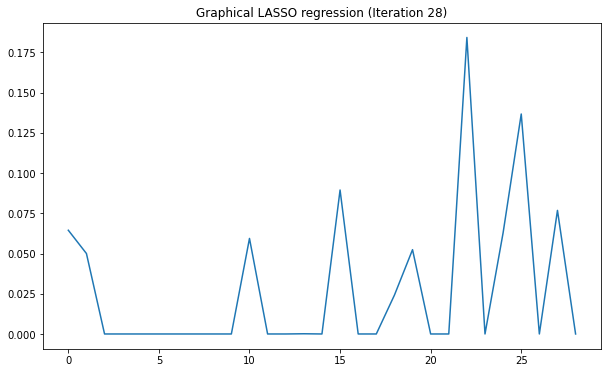

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(lasso_cv.coef_.T)
ax.set_title(f'Graphical LASSO regression (Iteration {i})')
plt.show()

# Repeated LASSO regress COVID-19 symptoms on prior, earlier, patient symptoms:

### Repeat LASSO regress by adding prior symptoms:

In [48]:
prior_symptoms = ['PriorCOVID', 'COVIDvaccine_unsure','COVIDvaccine_Likely', 'COVIDvaccine_Unlikely',
       'COVIDvaccine_VeryLikely', 'COVIDvaccine_VeryUnlikely', 'FLUVaccine']

In [49]:
prior_symptoms

['PriorCOVID',
 'COVIDvaccine_unsure',
 'COVIDvaccine_Likely',
 'COVIDvaccine_Unlikely',
 'COVIDvaccine_VeryLikely',
 'COVIDvaccine_VeryUnlikely',
 'FLUVaccine']

In [50]:
X_prior = df[prior_symptoms]

In [51]:
X_prior

,PriorCOVID,COVIDvaccine_unsure,COVIDvaccine_Likely,COVIDvaccine_Unlikely,COVIDvaccine_VeryLikely,COVIDvaccine_VeryUnlikely,FLUVaccine
0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0
3,0,1,0,0,0,0,1
4,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...
456,0,0,1,0,0,0,1
457,0,0,0,0,1,0,1
458,0,0,0,1,0,0,1
459,0,1,0,0,0,0,1


In [52]:
X_merged1 = pd.concat([X, X_prior], axis=1)

In [53]:
X_merged1

,Cough,Loss_of_smell,Muscle_aches,Fever,Shortness_of_breath,Numbness,Red_rash,Fatigue,Confusion,Pinkeye,...,Abdominal_pain,Joint_pain,Unexplained_rash,PriorCOVID,COVIDvaccine_unsure,COVIDvaccine_Likely,COVIDvaccine_Unlikely,COVIDvaccine_VeryLikely,COVIDvaccine_VeryUnlikely,FLUVaccine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
457,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
458,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
459,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_merged1, df['TestPositive'], test_size=0.2, random_state= 42)

In [55]:
lasso_cv1 = LassoCV(cv=5, max_iter=10000)
lasso_cv1.fit(X_merged1, df['TestPositive'])

LassoCV(cv=5, max_iter=10000)

In [56]:
symptom_weights_merged1 = pd.Series(lasso_cv1.coef_)

In [57]:
print(symptom_weights_merged1)

0     0.060856
1     0.019638
2     0.000000
3     0.000000
4     0.000000
5    -0.000000
6    -0.000000
7     0.000000
8    -0.000000
9     0.000000
10    0.058351
11    0.000000
12   -0.000000
13    0.000000
14    0.000000
15    0.083694
16    0.000000
17    0.000000
18    0.017698
19    0.050402
20   -0.000000
21    0.000000
22    0.183876
23    0.000000
24    0.062968
25    0.129233
26   -0.000000
27    0.073918
28    0.000000
29    0.000000
30    0.000000
31   -0.000000
32    0.000000
33   -0.000000
34    0.000000
35    0.000000
dtype: float64


In [58]:
test_score1 = lasso_cv1.score(X_merged1, df['TestPositive'])

In [59]:
test_score1

0.2956053680391907

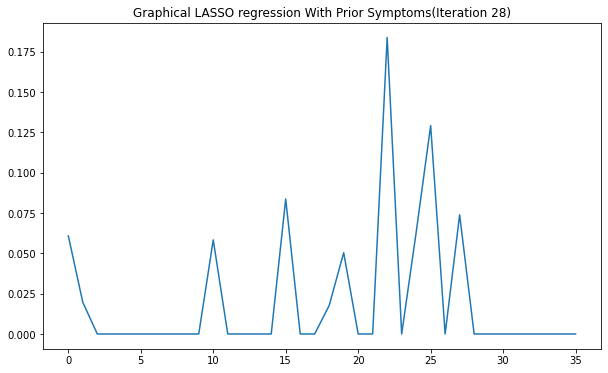

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(lasso_cv1.coef_.T)
ax.set_title(f'Graphical LASSO regression With Prior Symptoms(Iteration {i})')
plt.show()

### Repeat LASSO Regress by adding Earlier Symptoms:

In [61]:
earlier_symptoms = ['History_of_respiratory_symptoms','History_of_gastrointestinal_symptoms',
       'History_of_neurological_symptoms', 'History_of_inflammatory_symptoms']

In [62]:
X_earlier = df[earlier_symptoms]

In [63]:
X_earlier

,History_of_respiratory_symptoms,History_of_gastrointestinal_symptoms,History_of_neurological_symptoms,History_of_inflammatory_symptoms
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,0,0
4,0,0,0,0
...,...,...,...,...
456,0,0,0,0
457,0,0,0,0
458,0,1,0,0
459,0,0,0,0


In [64]:
X_merged2 = pd.concat([X_merged1, X_earlier], axis=1)

In [65]:
X_merged2

,Cough,Loss_of_smell,Muscle_aches,Fever,Shortness_of_breath,Numbness,Red_rash,Fatigue,Confusion,Pinkeye,...,COVIDvaccine_unsure,COVIDvaccine_Likely,COVIDvaccine_Unlikely,COVIDvaccine_VeryLikely,COVIDvaccine_VeryUnlikely,FLUVaccine,History_of_respiratory_symptoms,History_of_gastrointestinal_symptoms,History_of_neurological_symptoms,History_of_inflammatory_symptoms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
457,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
458,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
459,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_merged2, df['TestPositive'], test_size=0.2, random_state= 42)

In [67]:
lasso_cv2 = LassoCV(cv=5, max_iter=10000)
lasso_cv2.fit(X_merged2, df['TestPositive'])

LassoCV(cv=5, max_iter=10000)

In [68]:
symptom_weights_merged2 = pd.Series(lasso_cv2.coef_)

In [69]:
print(symptom_weights_merged2)

0     0.060856
1     0.019638
2     0.000000
3     0.000000
4     0.000000
5    -0.000000
6    -0.000000
7     0.000000
8    -0.000000
9     0.000000
10    0.058351
11    0.000000
12   -0.000000
13    0.000000
14    0.000000
15    0.083694
16    0.000000
17    0.000000
18    0.017698
19    0.050402
20   -0.000000
21    0.000000
22    0.183876
23    0.000000
24    0.062968
25    0.129233
26   -0.000000
27    0.073918
28    0.000000
29    0.000000
30    0.000000
31   -0.000000
32    0.000000
33   -0.000000
34    0.000000
35    0.000000
36    0.000000
37   -0.000000
38    0.000000
39   -0.000000
dtype: float64


In [70]:
test_score2 = lasso_cv2.score(X_merged2, df['TestPositive'])

In [71]:
test_score2

0.2956053680391907

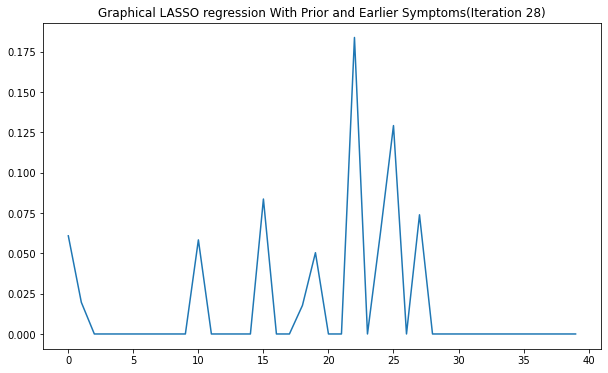

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(lasso_cv2.coef_.T)
ax.set_title(f'Graphical LASSO regression With Prior and Earlier Symptoms(Iteration {i})')
plt.show()